## Start The Project

In [3]:
# prompt: import important library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df.size

3582

In [7]:
df.duplicated().sum()

0

In [8]:
# checking columns' unique values
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,94
weight,351
acceleration,95
model year,13
origin,3
car name,305


In [9]:
(df['horsepower'] == '?').sum()

6

It seems like we have 6 values in horsepower column containing ?, and that is what is giving us the object data type instead of int.

# *** data cleaning***

In [10]:

# drop rows with '?' in horsepower column
df = df[df['horsepower'] != '?']

In [11]:
(df['horsepower'] == '?').sum()

0

In [12]:
#casting horsepower column to integer
df.horsepower = df.horsepower.astype(int)

# confirming changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


## Handling origin column
We'd map origin column according to the provided description (1 -> USA, 2 -> Europe, 3 -> Asia), and cast its datatype as category.

In [13]:
# parsing origin column
df.loc[df.origin == 1, 'origin'] = 'USA'
df.loc[df.origin == 2, 'origin'] = 'Europe'
df.loc[df.origin == 3, 'origin'] = 'Asia'

# casting origin column into category
df['origin'] = df['origin'].astype('category')

# validating changes
df['origin'].dtype

CategoricalDtype(categories=['Asia', 'Europe', 'USA'], ordered=False, categories_dtype=object)

## Data Visualization
In this section, we'd use some informative visuals to help us draw insights and conclusions about our data and also help us in our EDA.

In [14]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


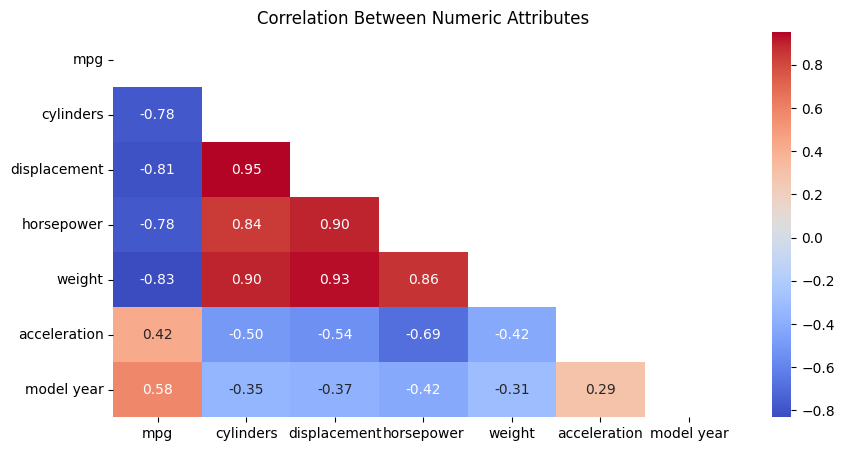

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation
corr = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, mask=mask, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Between Numeric Attributes")
plt.show()

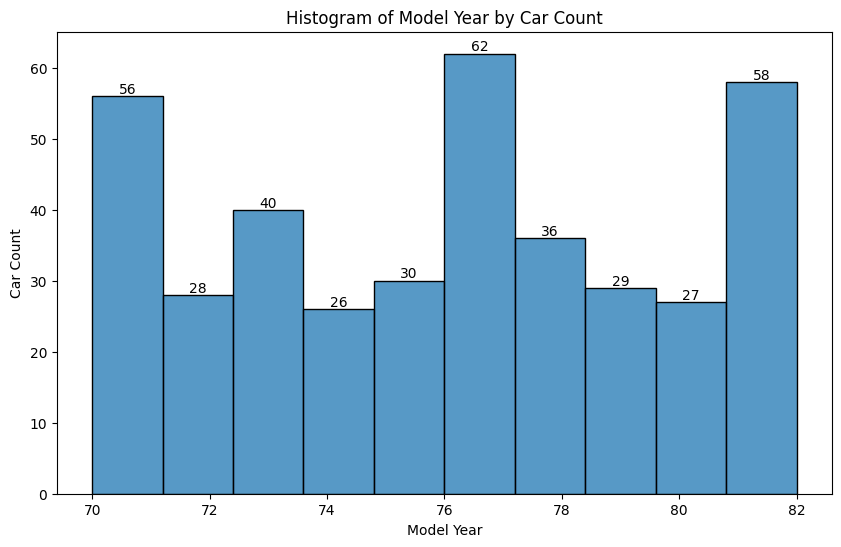

In [16]:
# Create the histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['model year'], kde=False)
plt.title('Histogram of Model Year by Car Count')
plt.xlabel('Model Year')
plt.ylabel('Car Count')

# Add value annotations to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

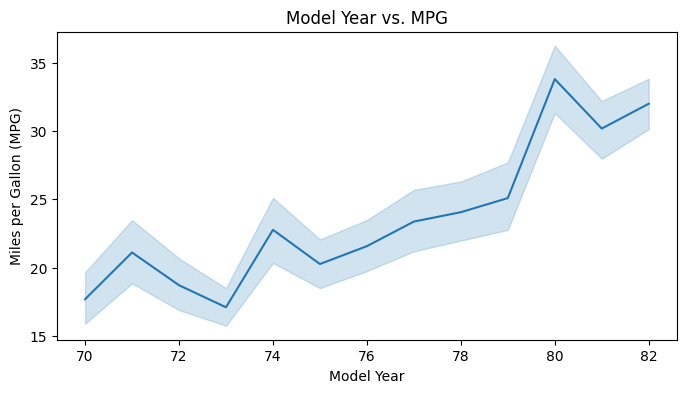

In [17]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='model year', y='mpg', data=df)
plt.title('Model Year vs. MPG')
plt.xlabel('Model Year')
plt.ylabel('Miles per Gallon (MPG)')
plt.show()

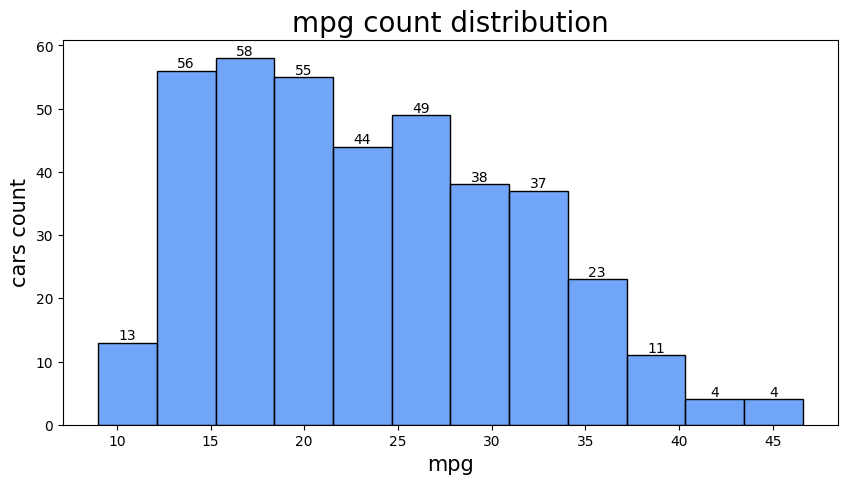

In [18]:
# ploting mpg distribution
plt.figure(figsize=(10,5))
ax = sns.histplot(x = 'mpg', data = df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("mpg count distribution", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

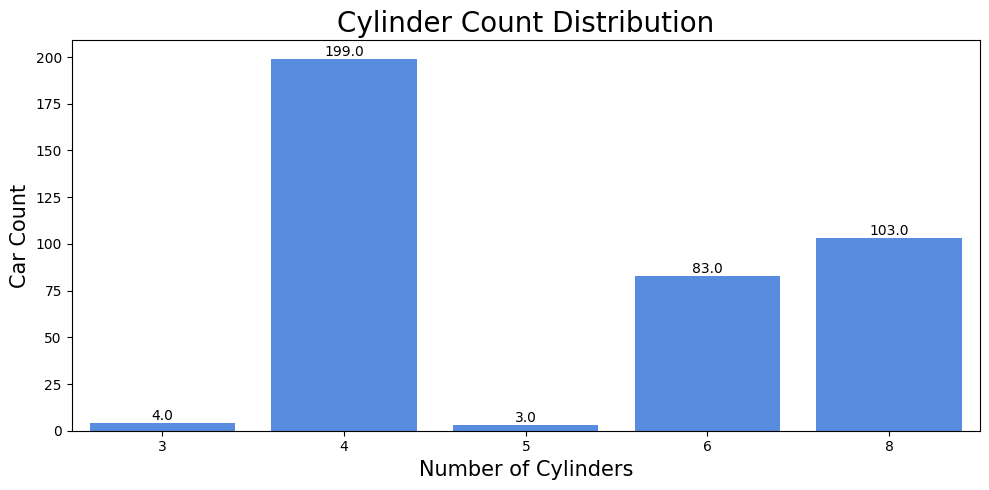

In [19]:
# Plotting cylinder column distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='cylinders', data=df, color='#4287f5')  # Set color
plt.title("Cylinder Count Distribution", fontsize=20)
plt.xlabel("Number of Cylinders", fontsize=15)
plt.ylabel("Car Count", fontsize=15)

# Remove the numbers between the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Optionally, you can adjust the spacing between bars if needed
plt.tight_layout()
plt.show()

* The vast majority in cars have 4 cylinder engine .

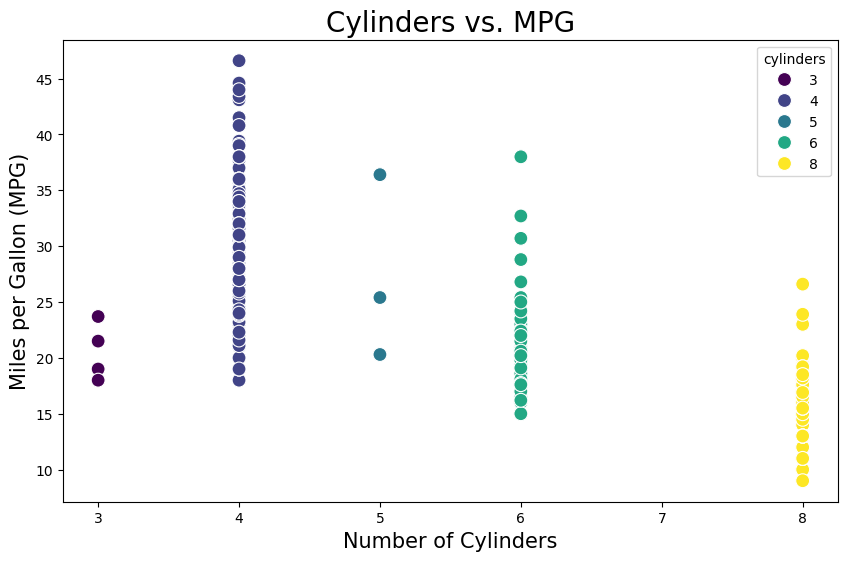

In [20]:
# ploting clynders against mpg
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cylinders', y='mpg', data=df, hue='cylinders', palette='viridis', s=100)
plt.title('Cylinders vs. MPG', fontsize=20)
plt.xlabel('Number of Cylinders', fontsize=15)
plt.ylabel('Miles per Gallon (MPG)', fontsize=15)
plt.show()

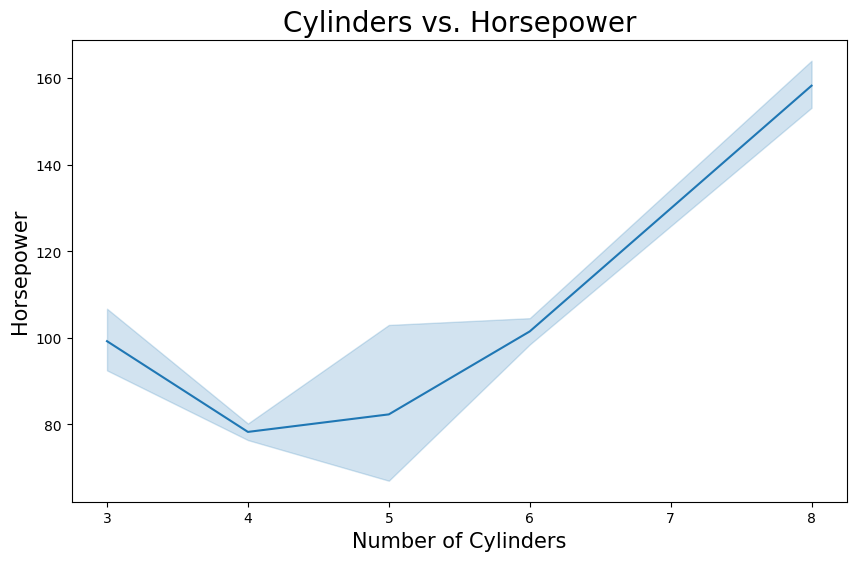

In [21]:
#plot a line chart for cylinders anainst horsepower
plt.figure(figsize=(10, 6))
sns.lineplot(x='cylinders', y='horsepower', data=df)
plt.title('Cylinders vs. Horsepower', fontsize=20)
plt.xlabel('Number of Cylinders', fontsize=15)
plt.ylabel('Horsepower', fontsize=15)
plt.show()

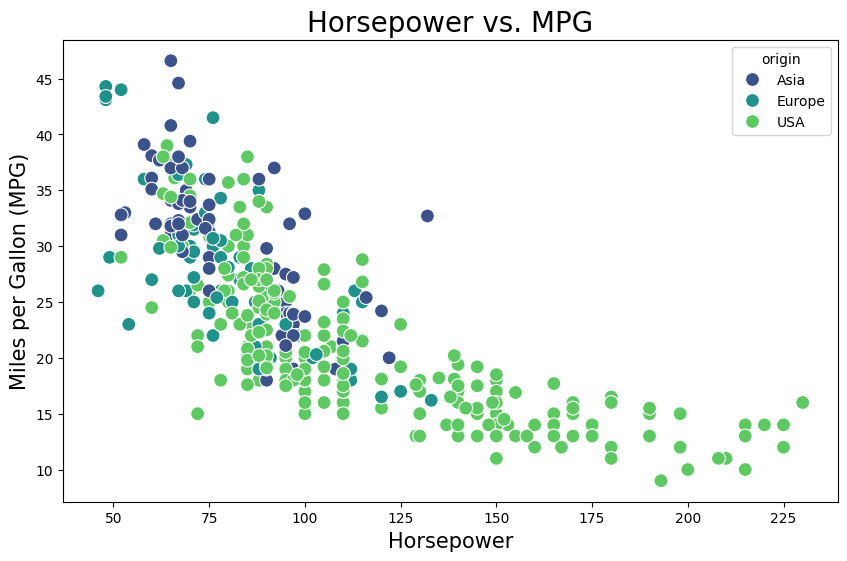

In [22]:
# ploting mpg against horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df, hue='origin', palette='viridis', s=100)
plt.title('Horsepower vs. MPG', fontsize=20)
plt.xlabel('Horsepower', fontsize=15)
plt.ylabel('Miles per Gallon (MPG)', fontsize=15)
plt.show()

From the above visuals, we can notice that:

As cylinders in the engine increases above 4, MPG decreases.
As cylinders in the engine increases above 4, engine horsepower increases.
there is negative correlation between mpg and horsepower.
## Next, we'll move into exploring origin column and find insights about each manufacturing country.

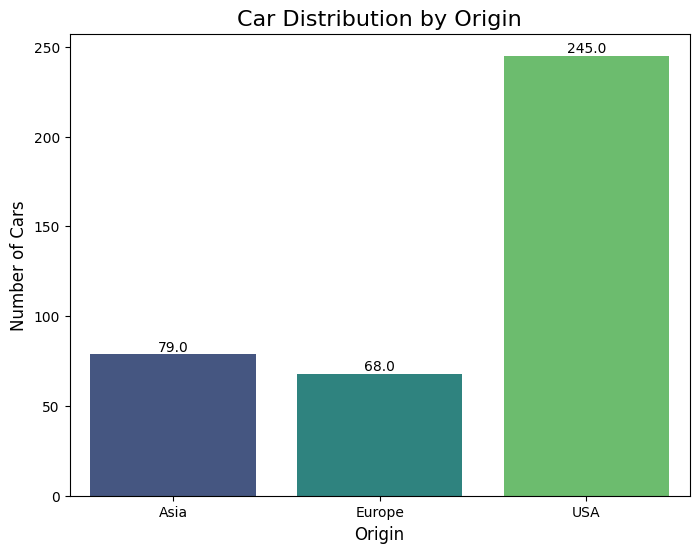

In [25]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='origin', data=df, palette='viridis')
plt.title('Car Distribution by Origin', fontsize=16)
plt.xlabel('Origin', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)

# Annotate the bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.show()

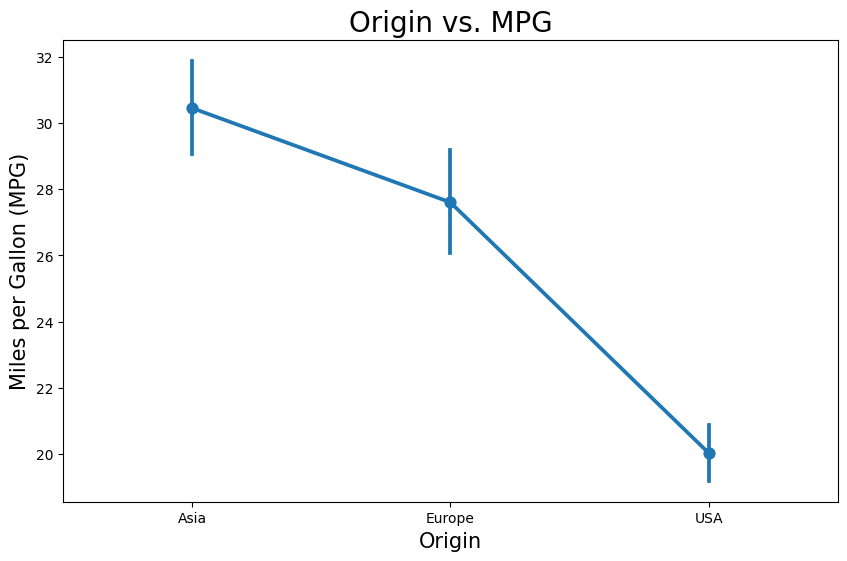

In [29]:
# ploting origin anainst mpg
plt.figure(figsize=(10, 6))
sns.pointplot(x='origin', y='mpg', data=df, marker='o') # Added markers for better visibility
plt.title('Origin vs. MPG', fontsize=20)
plt.xlabel('Origin', fontsize=15)
plt.ylabel('Miles per Gallon (MPG)', fontsize=15)
plt.show()

* Althogh USA has the biggest count of our dataset, it produces cars we relatively very low mpg compared to Asia and Europe
* Asia is the leading contry in producing cars with high mpg with a mean close to 30.

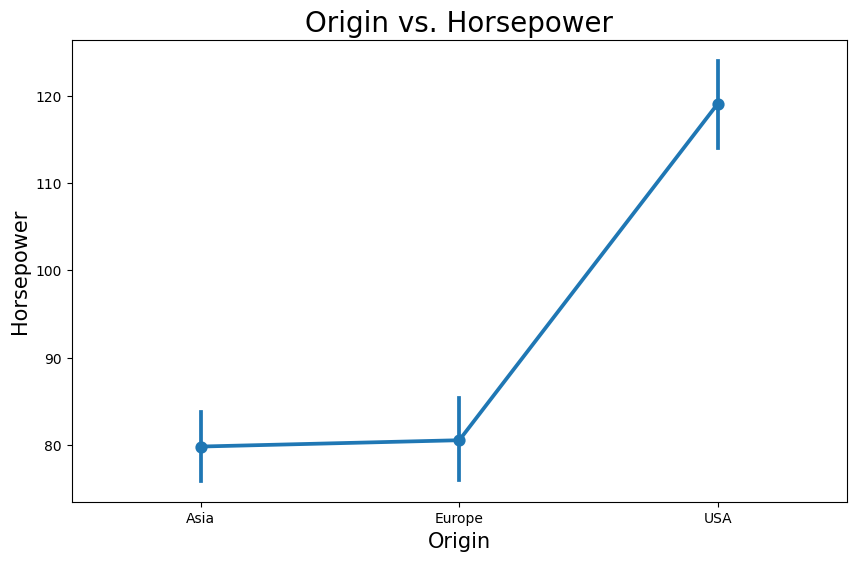

In [30]:

# ploting origin anainst horsepower
plt.figure(figsize=(10, 6))
sns.pointplot(x='origin', y='horsepower', data=df, marker='o') # Added markers for better visibility
plt.title('Origin vs. Horsepower', fontsize=20)
plt.xlabel('Origin', fontsize=15)
plt.ylabel('Horsepower', fontsize=15)
plt.show()

* As expected, USA has the highest engine horsepower. This implies the previously observed conclusion that hoursepower and mpg has a negative correlation.

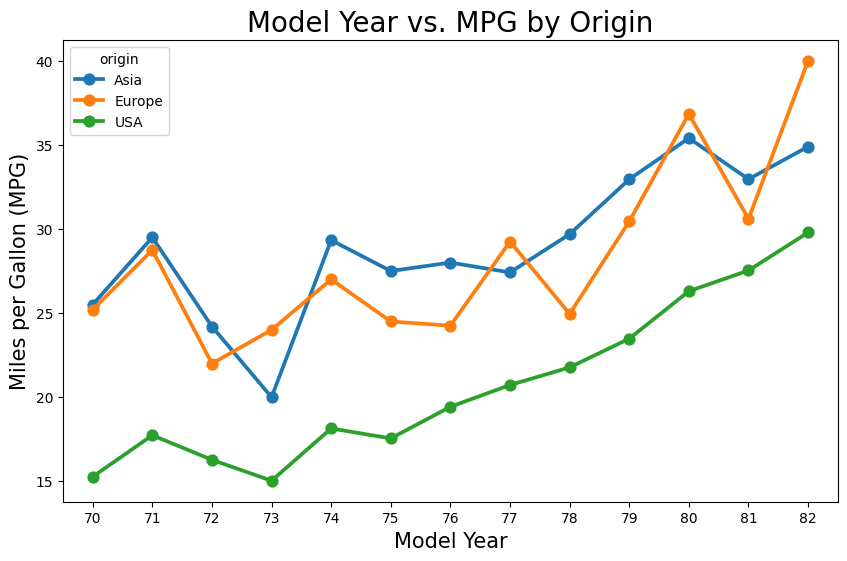

In [33]:
# display model year against mpg with respect to origin
plt.figure(figsize=(10, 6))
sns.pointplot(x='model year', y='mpg', hue='origin', data=df, ci = None)
plt.title('Model Year vs. MPG by Origin', fontsize=20)
plt.xlabel('Model Year', fontsize=15)
plt.ylabel('Miles per Gallon (MPG)', fontsize=15)
plt.show()

* This chart also implies the positive correlation between model year and mpg, and shows that Asia has been leading country in this industry, followed by Europe and USA comes in the last place.
## Let's now explore how weight has been affecting our car specs over the years.

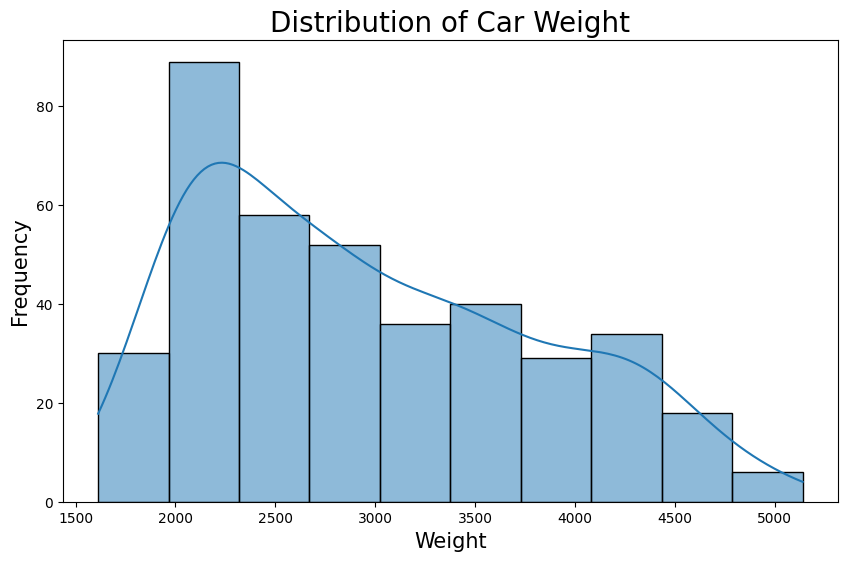

In [34]:
# hist plot a dist. of car weight

plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], kde=True)
plt.title('Distribution of Car Weight', fontsize=20)
plt.xlabel('Weight', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

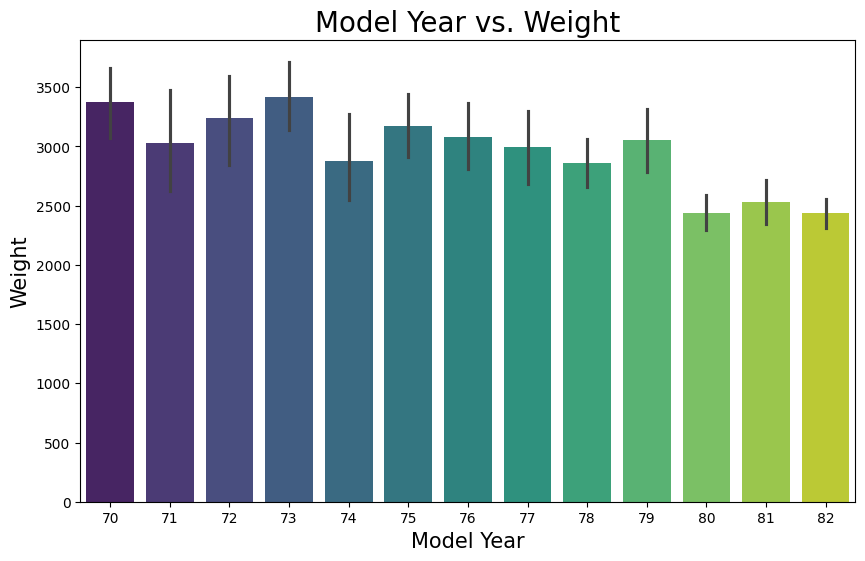

In [38]:
# bar plot of weight against model year
plt.figure(figsize=(10, 6))
sns.barplot(x='model year', y='weight', data=df, palette='viridis')
plt.title('Model Year vs. Weight', fontsize=20)
plt.xlabel('Model Year', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.show()

* Car weight has been decreasing over the years.

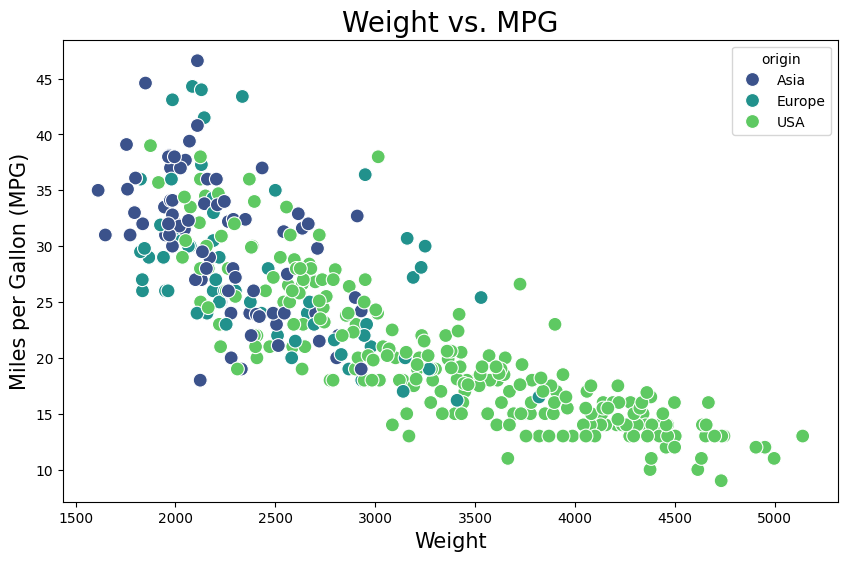

In [39]:
# ploting weight against mpg
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', data=df, hue='origin', palette='viridis', s=100)
plt.title('Weight vs. MPG', fontsize=20)
plt.xlabel('Weight', fontsize=15)
plt.ylabel('Miles per Gallon (MPG)', fontsize=15)
plt.show()

* mpg inceases as weight decreses over time, that indecates a stron correlation between them

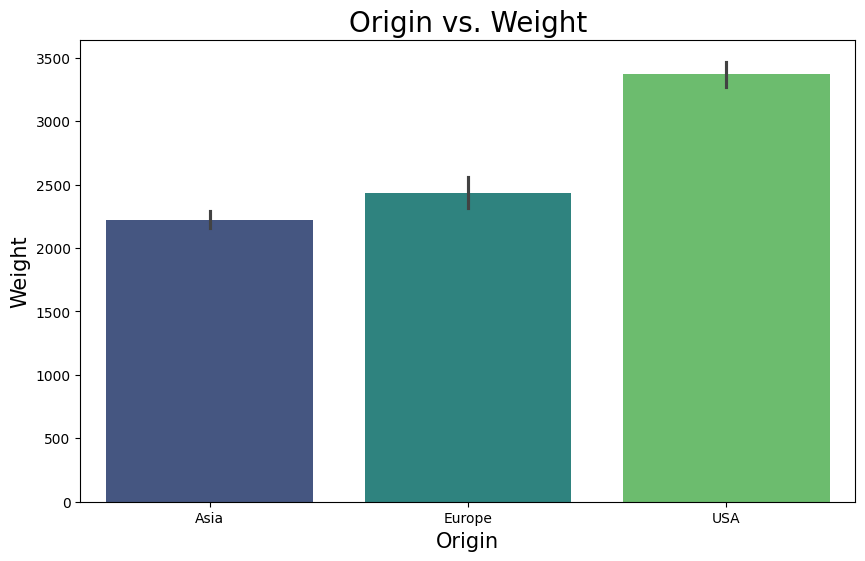

In [40]:
# ploting weight against origin
plt.figure(figsize=(10, 6))
sns.barplot(x='origin', y='weight', data=df, palette='viridis')
plt.title('Origin vs. Weight', fontsize=20)
plt.xlabel('Origin', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.show()

* As expected, USA gets the highest possible weight values, that explains alot about its low mpg and high horsepower.
* Asia produces the lightest cars campared to USA and Europe, this also explains itss high mpg and low horsepower.

## Let's take a final look at acceleration column, and how it is related to horsepower and mpg to get a better understanding of our findings.

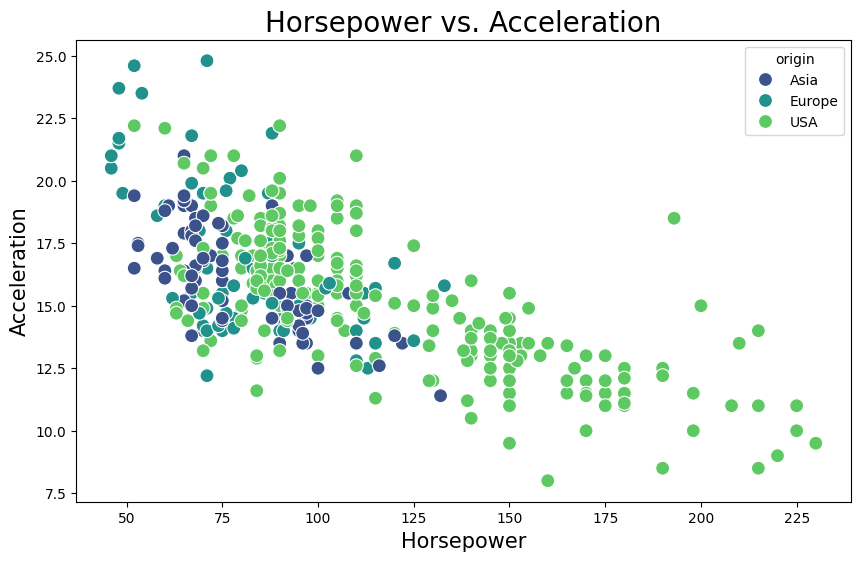

In [41]:
# ploting acceleration against horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='acceleration', data=df, hue='origin', palette='viridis', s=100)
plt.title('Horsepower vs. Acceleration', fontsize=20)
plt.xlabel('Horsepower', fontsize=15)
plt.ylabel('Acceleration', fontsize=15)
plt.show()

* Wa can spot a negative correlation between acceleration and horepower, this means that it has a positive one with mpg.



---



## Conclusion
In this section, we'd add the conclusions we draw from the previous visualisations.

* As years pass after 1973, there has been a noticable increase in mpg.
* As cylinders in the engine increases above 4, MPG decreases and engine horsepower increases. That indicates negative correlation between mpg and horsepower.
* mpg increases as weight decreses over time, that also indecates a stron correlation between them.
* Althogh USA has the biggest count of produced cars, its cars has relatively very low mpg, thus the highest possible weight compared to Asia and Europe
* Asia is the leading contry in producing cars with high mpg with a mean close to 30, and it produces the lightest cars
* We can spot a negative correlation between acceleration and horepower, this means that it has a positive one with mpg.